In [214]:
#Importing all libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#To display the last output not only the last result we use interactive shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
#Reading an excel file
Emp_outcomes=pd.read_excel("./aspiring_minds_employability_outcomes_2015.xlsx")

In [4]:
Emp_outcomes.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [5]:
The dataset has 3998 rows and 39 columns
Emp_outcomes.shape

(3998, 39)

In [ ]:
# Description of data:
The data set is related to students with engineering disciplines. The dataset contains employment outcomes of engineering graduates 
as dependent variables like salary,job titles and job locations.

The dataset contains 40 independent variables and 4000 data points.
Those independent variables are both continous and categorical in nature.

In [6]:
Emp_outcomes.dtypes

Unnamed: 0                       object
ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64


In [6]:
#dropping the unnamed column
Emp_outcomes.drop(['Unnamed: 0'],axis='columns',inplace=True)

In [9]:
Emp_outcomes.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [7]:
#New column was created which tells the employee is present in the company or left from the company
Emp_outcomes['Currentemp']= np.where(Emp_outcomes['DOL']!= 'present', 'Left', 'Present')
Emp_outcomes.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Currentemp
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,Present
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,Present
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,Present
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,Present
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,Left


In [8]:
Emp_outcomes.sort_values(by=['ID'])

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Currentemp
1932,11244,565000,2011-04-01,2014-04-01 00:00:00,software test engineer,Bangalore,m,1988-09-25,75.00,cbse,...,-1,-1,-1,-1,0.6646,1.1248,0.3817,-0.8778,0.3444,Left
3816,16037,300000,2012-06-01,2013-08-01 00:00:00,software engineer,Noida,m,1988-10-21,60.00,cbse,...,-1,-1,-1,-1,-0.8810,-0.4353,-0.9245,-0.9953,-0.6430,Left
2393,16400,650000,2010-12-01,present,business analyst consultant,Hyderabad,m,1989-12-29,83.80,cbse,...,-1,-1,-1,-1,-1.1901,0.1888,-0.7794,1.1199,-1.3934,Present
2263,17126,370000,2011-02-01,2012-09-01 00:00:00,project engineer,Hyderabad,m,1989-04-24,76.00,u p board,...,-1,-1,-1,-1,0.3555,1.2808,1.3977,-0.9953,-0.2875,Left
922,21229,500000,2010-02-01,2015-04-01 00:00:00,senior project engineer,bangalore,m,1984-01-04,55.52,kseeb,...,-1,-1,-1,-1,0.8192,0.6568,0.2366,0.0623,0.3444,Left
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2379,1297763,105000,2013-12-01,2014-04-01 00:00:00,ui developer,Bangalore,m,1989-10-15,57.00,state board,...,-1,-1,-1,-1,0.8463,-0.4536,-0.7585,-0.2344,1.0554,Left
1943,1297773,325000,2014-11-01,present,software engineer,Bangalore,m,1990-03-14,76.40,state board,...,-1,-1,-1,-1,0.1282,-0.4536,-1.0659,-0.9950,0.2889,Present
936,1297805,210000,2013-11-01,present,it recruiter,New Delhi,m,1989-03-01,69.00,cbse,...,-1,-1,-1,-1,0.5591,-0.2871,0.1637,0.1459,0.2889,Present
1347,1297877,220000,2014-11-01,present,customer service,Bangalore,f,1991-10-06,82.88,state board,...,-1,-1,-1,-1,0.7027,0.5454,0.7785,0.0192,-0.4776,Present


In [9]:
#Finding null values in the columns
Emp_outcomes.isnull().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [16]:
Emp_outcomes['Salary'].unique()

array([ 420000,  500000,  325000, 1100000,  200000,  300000,  400000,
        600000,  230000,  450000,  270000,  350000,  250000,  120000,
        320000,  190000,  180000,  335000,  435000,  345000,  145000,
        220000,  530000,  340000,  360000,  215000,   80000,  330000,
        380000,  110000,  205000,   95000,  390000,   60000,  240000,
        525000,  305000,  150000,  310000,  455000,  800000,  100000,
        280000,  445000,  315000,  370000,  275000, 1500000,  425000,
        470000,  460000,  510000,  480000,  170000,  640000,  225000,
        440000, 1200000,  675000,  105000,  195000,  385000,  235000,
        615000,  290000,  140000,  405000, 1860000,  375000,  430000,
        660000,   70000,  410000,  550000,   35000,  115000,  415000,
        265000,  285000,  245000,  395000,  560000,  700000,  185000,
        160000,  625000,   85000,  135000,  785000,  210000,  155000,
        355000,  535000,  690000,  260000, 1110000, 1000000,  505000,
        475000,  715

In [10]:
#converting data type to datetime
Emp_outcomes[['DOJ', 'DOB','12graduation','GraduationYear']] = Emp_outcomes[['DOJ', 'DOB','12graduation','GraduationYear']].apply(pd.to_datetime)
Emp_outcomes[['DOJ', 'DOB','12graduation','GraduationYear']] = Emp_outcomes[['DOJ', 'DOB','12graduation','GraduationYear']].values.astype('datetime64[s]')

In [11]:
# settings to display all columns
pd.set_option("display.max_columns", None)
# display the dataframe head
Emp_outcomes.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Currentemp
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",1970-01-01,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,1970-01-01,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,Present
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,1970-01-01,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,1970-01-01,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,Present
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,1970-01-01,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,1970-01-01,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,Present
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,1970-01-01,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,1970-01-01,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,Present
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,1970-01-01,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,1970-01-01,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,Left


In [12]:
#Gathering unique data from 12board column
Emp_outcomes['12board'].unique()

array(['board of intermediate education,ap', 'cbse', 'state board',
       'mp board', 'isc', 'icse', 'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 0, 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc', 'isc board',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'isce', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate sta

In [13]:
replace_list_state=['board of intermediate education,ap', 'state board',
       'mp board',  'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board', 'stateboard', 'hsc',
       'electonincs and communication(dote)', 'karnataka pu board',
       'government polytechnic mumbai , mumbai board', 'pu board',
       'baord of intermediate education', 'apbie', 'andhra board',
       'tamilnadu stateboard',
       'west bengal council of higher secondary education',
       'cbse,new delhi', 'u p board', 'intermediate', 'biec,patna',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'hsc pune', 'pu board karnataka', 'kerala', 'gsheb',
       'up(allahabad)', 'nagpur', 'st joseph hr sec school',
       'pre university board', 'ipe', 'maharashtra', 'kea', 'apsb',
       'himachal pradesh board of school education', 'staae board',
       'international baccalaureate (ib) diploma', 'nios',
       'karnataka board of university',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'scte vt orissa', 'matriculation',
       'department of pre-university education', 'wbscte',
       'preuniversity board(karnataka)', 'jharkhand accademic council',
       'bieap', 'msbte (diploma in computer technology)',
       'jharkhand acamedic council (ranchi)',
       'department of pre-university eduction', 'biec',
       'sjrcw', ' board of intermediate', 'msbte',
       'sri sankara vidyalaya', 'chse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'state board of technical eduction panchkula', 'upbhsie', 'apbsc',
       'state board of technical education and training',
       'secondary board of rajasthan',
       'tamilnadu higher secondary education board',
       'jharkhand academic council',
       'board of intermediate education,hyderabad', 'up baord', 'pu',
       'dte', 'board of secondary education', 'pre-university',
       'board of intermediate education,andhra pradesh',
       'up board , allahabad', 'srv girls higher sec school,rasipuram',
       'intermediate board of education,andhra pradesh',
       'intermediate board examination',
       'department of pre-university education, bangalore',
       'stmiras college for girls', 'mbose',
       'department of pre-university education(government of karnataka)',
       'dpue', 'msbte pune', 'board of school education harayana',
       'sbte, jharkhand', 'bihar intermediate education council, patna',
       'higher secondary', 's j polytechnic', 'latur',
       'board of secondary education, rajasthan', 'jyoti nivas', 'pseb',
       'biec-patna', 'board of intermediate education,andra pradesh',
       'chse,orissa', 'pre-university board', 'mp', 'intermediate board',
       'govt of karnataka department of pre-university education',
       'karnataka education board',
       'board of secondary school of education', 'pu board ,karnataka',
       'karnataka secondary education board', 'karnataka sslc',
       'board of intermediate ap', 'u p', 'state board of karnataka',
       'directorate of technical education,banglore', 'matric board',
       'andhpradesh board of intermediate education',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'bte up', 'scte and vt ,orissa', 'hbsc',
       'jawahar higher secondary school', 'nagpur board', 'bsemp',
       'board of intermediate education, andhra pradesh',
       'board of higher secondary orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of intermediate education:ap,hyderabad', 'science college',
       'karnatak pu board', 'aissce', 'pre university board of karnataka',
       'bihar', 'kerala state board', 'uo board', 
       'karnataka board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'jaycee matriculation school',
       'board of higher secondary examination, kerala',
       'uttaranchal state board', 'intermidiate', 'bciec,patna', 'bice',
       'karnataka state', 'state broad', 'wbbhse', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'gseb/technical education board', 'msbshse,pune',
       'tamilnadu state board', 'board of technical education',
       'kerala university', 'uttaranchal shiksha avam pariksha parishad',
       'chse(concil of higher secondary education)',
       'bright way college, (up board)', 'board of intermidiate',
       'higher secondary state certificate', 'karanataka secondary board',
       'maharashtra board', 'cgbse', 'diploma in computers', 'bte,delhi',
       'rajasthan board ajmer', 'mpbse', 'pune board',
       'state board of technical education', 'gshseb',
       'amravati divisional board', 'dote (diploma - computer engg)',
       'karnataka pre-university board', 'jharkhand board',
       'punjab state board of technical education & industrial training',
       'department of technical education',
       'sri chaitanya junior kalasala', 'state board (jac, ranchi)',
       'aligarh muslim university', 'tamil nadu state board', 'hse',
       'karnataka secondary education', 'state board ',
       'karnataka pre unversity board',
       'ks rangasamy institute of technology',
       'karnataka board secondary education', 'narayana junior college',
       'bteup', 'board of intermediate(bie)', 'hsc maharashtra board',
       'tamil nadu state', 'uttrakhand board', 'psbte',
       'stateboard/tamil nadu', 'intermediate council patna',
       'technical board, punchkula', 'board of intermidiate examination',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ap board', 'nashik board', 'himachal pradesh board',
       'maharashtra satate board',
       'andhra pradesh board of secondary education',
       'tamil nadu polytechnic',
       'maharashtra state board mumbai divisional board',
       'department of pre university education',
       'dav public school,hehal', 'board of intermediate education, ap',
       'rajasthan board of secondary education',
       'department of technical education, bangalore', 'chse,odisha',
       'maharashtra nasik board',
       'west bengal council of higher secondary examination (wbchse)',
       'holy cross matriculation hr sec school', 'cbsc',
       'pu  board karnataka', 'biec patna', 'kolhapur', 'bseb, patna',
       'up board allahabad', 'nagpur board,nagpur', 'diploma(msbte)',
       'dav public school', 'pre university board, karnataka',
       'ssm srsecschool', 'state bord', 'jstb,jharkhand',
       'intermediate board of education', 'mp board bhopal', 'pub',
       'madhya pradesh board', 'bihar intermediate education council',
       'west bengal council of higher secondary eucation',
        'mpc',
       'certificate for higher secondary education (chse)orissa',
       'maharashtra state board for hsc',
       'board of intermeadiate education', 'latur board',
       'andhra pradesh', 'karnataka pre-university',
       'lucknow public college', 'nagpur divisional board',
       'ap intermediate board', 'cgbse raipur', 'uttranchal board',
       'jiec', 
       'bihar school examination board patna',
       'state board of technical education harayana', 'mp-bse',
       'up bourd', 'dav public school sec 14',
       'haryana state board of technical education chandigarh',
       'council for indian school certificate examination',
       'jaswant modern school', 'madhya pradesh open school',
       'aurangabad board', 'j&k state board of school education',
       'diploma ( maharashtra state board of technical education)',
       'board of technicaleducation ,delhi',
       'maharashtra state boar of secondary and higher secondary education',
       'hslc (tamil nadu state board)',
       'karnataka state examination board', 'puboard', 'nasik',
       'west bengal board of higher secondary education',
       'up board,allahabad', 'board of intrmediate education,ap', 
       'karnataka state pre- university board',
       'state board - west bengal council of higher secondary education : wbchse',
       'maharashtra state board of secondary & higher secondary education',
       'biec, patna', 'state syllabus', 'cbse board', 'scte&vt',
       'board of intermediate,ap',
       'secnior secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)',
       'board of intermidiate education,ap',
       'board of high school and intermediate education uttarpradesh',
       'higher secondary education',
       'board fo intermediate education, ap', 'intermedite',
       'ap board for intermediate education', 'ahsec',
       'punjab state board of technical education & industrial training, chandigarh',
       'state board - tamilnadu', 'jharkhand acedemic council',
       'scte & vt (diploma)', 'karnataka pu',
       'board of intmediate education ap', 'up-board',
       'boardofintermediate','up bord',
                    'andhra pradesh state board',
                   'gujarat board','karnataka state education examination board','kerala state technical education',
                    'state boardmp board ',
                   'gujarat state board','ap state board']

In [14]:
#replacing the redundant values of the 12board column with 'state','cbse','icse' and 'n/a'
for i in replace_list_state:
    Emp_outcomes['12board'].replace(i,'state',inplace=True)

replace_list_cbse=['cbse', 
       'all india board', 
       'central board of secondary education, new delhi', 'cbese']
for i in replace_list_cbse:
    Emp_outcomes['12board'].replace(i,'cbse',inplace=True)

replace_list_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi']
for i in replace_list_icse:
    Emp_outcomes['12board'].replace(i,'icse',inplace=True)
Emp_outcomes['12board'].replace(0,np.NaN,inplace=True)
Emp_outcomes['12board'].replace('n/a',np.NaN,inplace=True)

Emp_outcomes['12board'].unique()

array(['state', 'cbse', 'icse', nan, 'intermideate'], dtype=object)

In [15]:
replace_list_ssc=['board ofsecondary education,ap','karnataka secondary school of examination','bse',
                  'state board of secondary education, andhra pradesh','board of secondary education(bse) orissa',
                  'little jacky matric higher secondary school','bsc,orissa','matriculation board',
                  'haryana board of school education,(hbse)','j & k bord','metric','kseeb','maticulation',
                  'karnataka secondory education board','sslc','board secondary  education','mumbai board','kseb',
                  'wbbse','west bengal board of secondary education','jharkhand secondary examination board,ranchi',
                  'sss pune','bseb,patna',
                  'seba',
       'punjab school education board, mohali', 'hse,board',
       'board of ssc education andhra pradesh', 'bse,odisha', 'karnataka secondary eduction',
       'secondary education board of rajasthan', 'apsche',
       'board of  secondary education',
       'board of secondary education - andhra pradesh',
                  'karnataka education board (keeb)',
       'state board of secondary education( ssc)',
       'don bosco maatriculation school',
       'karnataka state secondary education board',
       'certificate of middle years program of ib',
       'karnataka board of secondary education',
       'board of secendary education orissa',
       'karantaka secondary education and examination borad',
       'kseeb(karnataka secondary education examination board)',
                  'state(karnataka board)',
       'jharkhand secondary examination board (ranchi)',
       'karnataka secondary education examination board', 'delhi board',
       'mirza ahmed ali baig', 'jseb', 'bse, odisha',
       'tamilnadu matriculation board', 'jharkhand secondary board',
       'board of secondary education,andhara pradesh',
       'state board of secondary education,andhra pradesh',
       'stjosephs girls higher sec school,dindigul',
       'education board of kerala', 'board of ssc',
       'maharashtra state board pune', 'secondary school cerfificate',
       'maharashtra sate board', 'ksseb',
       'bihar examination board, patna', 'state borad hp', 'cluny',
       'bsepatna', 'up borad', 'ssc board of andrapradesh', 'matric',
       'bse,orissa', 'ssc-andhra pradesh', 'mhsbse',
       'karnataka sslc board bangalore', 'karnataka',
       'secondary school of education', 'karnataka secondary board',
       'andhra pradesh board ssc', 'hse,orissa', 'national public school',
       'board of secondary education, andhra pradesh',
       'board of secondary education orissa',
       'board of secondary education,ap',
       'board of secondary education,andhra pradesh',
       'jawahar navodaya vidyalaya', 'aisse',
       'karnataka board of higher education',
       'bharathi matriculation school', 'wbbsce', 'mp state board',
       'seba(assam)', 'anglo indian', 'bse(board of secondary education)',
       'school secondary education, andhra pradesh',
       'secondary state certificate',
       'maharashtra state board of secondary and higher secondary education,pune',
       'stmary higher secondary', 'secondary school certificate', 'cbse ',
       'board of secondary education,orissa',
                  'maharashtra state board,pune', 'kiran english medium high school',
       'sarada high scchool',
       'kalaimagal matriculation higher secondary school',
       'maharastra board', 'sslc board', 'ssc maharashtra board',
       'bihar secondary education board,patna',
       'haryana board of school education',
       'ksseb(karnataka state board)',
       'jharkhand secondary education board',
       'state board of secondary education, ap', 'hsce',
       'board of secondary education,odisha',
       'west bengal board of secondary examination (wbbse)', 'apssc',
       'bseb patna', 'biharboard', 'pune', 'gyan bharati school',
                  'rbse,ajmer',
       'board of secondaray education', 'secondary school education',
       'jbse,jharkhand', 'bihar school examination board',
       'west bengal board of secondary eucation',
                  'board of secondary education (bse) orissa',
       'maharashtra state board for ssc',
       'board of secondary school education',
                   'ksbe', 'sslc,karnataka',
       'board of school education haryana',
       'maharashtra state board of secondary and higher secondary education',
       'ssc regular', 'west bengal  board of secondary education',
       'bseb ,patna',
       'state board - west bengal board of secondary education : wbbse',
       'ap state board for secondary education'
                 
                 ]

In [16]:
#replacing the redundant values of the 10board column with 'state','cbse','icse' and 'n/a'
for i in replace_list_state:
    Emp_outcomes['10board'].replace(i,'state',inplace=True)
    
for i in replace_list_ssc:
    Emp_outcomes['10board'].replace(i,'ssc',inplace=True)
    
replace_list_cbse=['cbse',  'cbse[gulf zone]',
       'all india board', 'delhi public school',
       'central board of secondary education, new delhi', 'cbese']
for i in replace_list_cbse:
    Emp_outcomes['10board'].replace(i,'cbse',inplace=True)

replace_list_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse','icse board , new delhi',
       'isc board , new delhi','icse board',"stmary's convent inter college"]
for i in replace_list_icse:
    Emp_outcomes['10board'].replace(i,'icse',inplace=True)

Emp_outcomes['10board'].replace('n/a',np.NaN,inplace=True)
Emp_outcomes['10board'].replace(0,np.NaN,inplace=True)

Emp_outcomes['10board'].unique()

array(['ssc', 'cbse', 'state', 'icse', nan], dtype=object)

In [17]:
Emp_outcomes['Degree'].unique()

array(['B.Tech/B.E.', 'MCA', 'M.Tech./M.E.', 'M.Sc. (Tech.)'],
      dtype=object)

In [18]:
# display the dataframe head
Emp_outcomes.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Currentemp
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,ssc,1970-01-01,95.8,state,1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,1970-01-01,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,Present
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,1970-01-01,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,1970-01-01,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,Present
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,1970-01-01,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,1970-01-01,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,Present
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,1970-01-01,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,1970-01-01,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,Present
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,1970-01-01,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,1970-01-01,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,Left


In [33]:
Emp_outcomes.isnull().sum()

ID                         0
Salary                     0
DOJ                        0
DOL                        0
Designation                0
JobCity                    0
Gender                     0
DOB                        0
10percentage               0
10board                  350
12graduation               0
12percentage               0
12board                  359
CollegeID                  0
CollegeTier                0
Degree                     0
Specialization             0
collegeGPA                 0
CollegeCityID              0
CollegeCityTier            0
CollegeState               0
GraduationYear             0
English                    0
Logical                    0
Quant                      0
Domain                     0
ComputerProgramming        0
ElectronicsAndSemicon      0
ComputerScience            0
MechanicalEngg             0
ElectricalEngg             0
TelecomEngg                0
CivilEngg                  0
conscientiousness          0
agreeableness 

In [19]:
(Emp_outcomes== 0).astype(int).sum(axis=0) #counting the number of 0's per column

ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                     0
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier          2797
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                      0
ComputerProgramming         0
ElectronicsAndSemicon       0
ComputerScience             0
MechanicalEngg              0
ElectricalEngg              0
TelecomEngg                 0
CivilEngg                   0
conscienti

In [20]:
Emp_outcomes.isin([-1]).sum()

ID                          0
Salary                      0
DOJ                         0
DOL                         0
Designation                 0
JobCity                   461
Gender                      0
DOB                         0
10percentage                0
10board                     0
12graduation                0
12percentage                0
12board                     0
CollegeID                   0
CollegeTier                 0
Degree                      0
Specialization              0
collegeGPA                  0
CollegeCityID               0
CollegeCityTier             0
CollegeState                0
GraduationYear              0
English                     0
Logical                     0
Quant                       0
Domain                    246
ComputerProgramming       868
ElectronicsAndSemicon    2854
ComputerScience          3096
MechanicalEngg           3763
ElectricalEngg           3837
TelecomEngg              3624
CivilEngg                3956
conscienti

In [21]:
#Replacing values from -1 to 0
cols = ["Domain","ComputerProgramming","ElectronicsAndSemicon","ComputerScience","MechanicalEngg","ElectricalEngg","TelecomEngg","CivilEngg"]
Emp_outcomes[cols] = Emp_outcomes[cols].replace({-1:0})

In [22]:
#Finding -1 is there in the columns or not
Emp_outcomes.isin([-1]).sum()

ID                         0
Salary                     0
DOJ                        0
DOL                        0
Designation                0
JobCity                  461
Gender                     0
DOB                        0
10percentage               0
10board                    0
12graduation               0
12percentage               0
12board                    0
CollegeID                  0
CollegeTier                0
Degree                     0
Specialization             0
collegeGPA                 0
CollegeCityID              0
CollegeCityTier            0
CollegeState               0
GraduationYear             0
English                    0
Logical                    0
Quant                      0
Domain                     0
ComputerProgramming        0
ElectronicsAndSemicon      0
ComputerScience            0
MechanicalEngg             0
ElectricalEngg             0
TelecomEngg                0
CivilEngg                  0
conscientiousness          0
agreeableness 

In [23]:
#Created a new column(Total marks) which is summation of multiple marks columns
column_names = ['English','Logical','Quant','Domain','ComputerProgramming','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']
Emp_outcomes['TotalMarks']= Emp_outcomes[column_names].sum(axis=1)
Emp_outcomes.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Currentemp,TotalMarks
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,ssc,1970-01-01,95.8,state,1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,1970-01-01,515,585,525,0.635979,445,0,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,Present,2073.858779
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,1970-01-01,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,1970-01-01,695,610,780,0.960603,0,466,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,Present,2553.601703
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,1970-01-01,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,1970-01-01,615,545,370,0.450877,395,0,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,Present,1927.401177
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,1970-01-01,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,1970-01-01,635,585,625,0.974396,615,0,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,Present,2459.694396
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,1970-01-01,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,1970-01-01,545,625,465,0.124502,0,233,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,Left,1865.856632


#### Univariate Analysis


In [166]:
#Applying normalization on Designation column
item_counts = Emp_outcomes["Designation"].value_counts(normalize=True)
print(item_counts)

software engineer            0.134817
software developer           0.066283
system engineer              0.051276
programmer analyst           0.034767
systems engineer             0.029515
                               ...   
sharepoint developer         0.000250
software engineer analyst    0.000250
account manager              0.000250
db2 dba                      0.000250
operational executive        0.000250
Name: Designation, Length: 419, dtype: float64


In [222]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

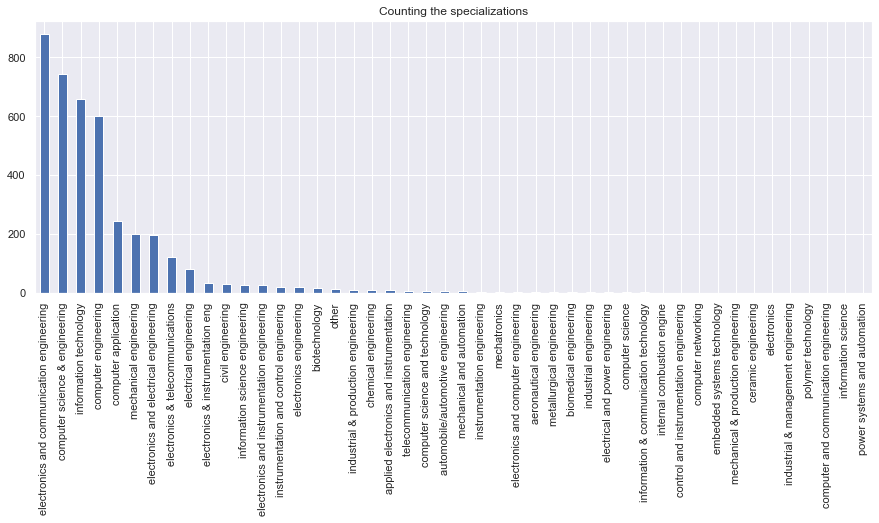

In [225]:
#Barchart on Specialization
specialization_freq = Emp_outcomes['Specialization'].value_counts()
specialization_freq.plot(kind='bar', figsize=(15,5))
k=plt.title("Counting the specializations")
k=plt.show()

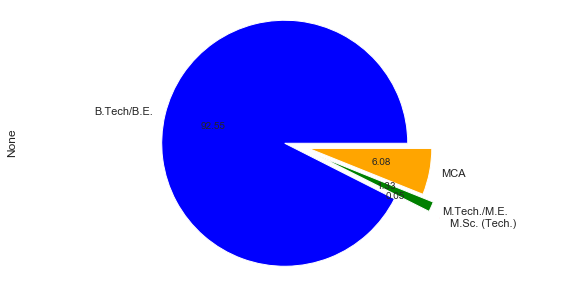

In [229]:
#Pie chart on degree. 92% of employees from BTECH/BE background and least 0.05% of employees from MSC
k=plt.figure(figsize=(10,5))
explode = (0.1, 0.3, 0.2,0.1)
colors=['blue','red','green','orange']
k=Emp_outcomes.groupby('Degree').size().plot(kind='pie', colors=colors,autopct='%.2f',explode=explode)
k=plt.axis('equal')
k=plt.show()

In [26]:
Emp_outcomes.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Currentemp,TotalMarks
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,ssc,1970-01-01,95.8,state,1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,1970-01-01,515,585,525,0.635979,445,0,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,Present,2073.858779
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,1970-01-01,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,1970-01-01,695,610,780,0.960603,0,466,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,Present,2553.601703
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,1970-01-01,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,1970-01-01,615,545,370,0.450877,395,0,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,Present,1927.401177
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,1970-01-01,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,1970-01-01,635,585,625,0.974396,615,0,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,Present,2459.694396
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,1970-01-01,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,1970-01-01,545,625,465,0.124502,0,233,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,Left,1865.856632


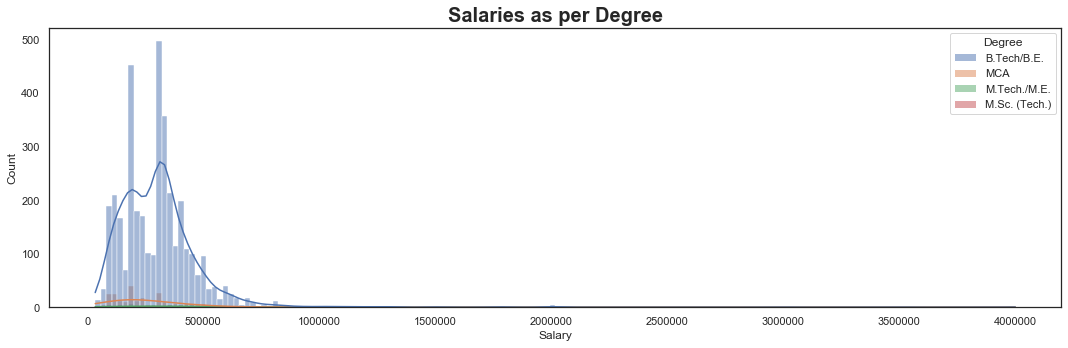

In [30]:
#Salaries as per the degree
fig=plt.figure(figsize=(15,5))


fig=sns.set(style="white")

fig=sns.histplot(data=Emp_outcomes, x="Salary", kde=True,color='green',hue='Degree')
fig=fig.set_title("Salaries as per Degree",fontsize=20,fontweight="bold")
fig=plt.tight_layout()
plt.show(fig)

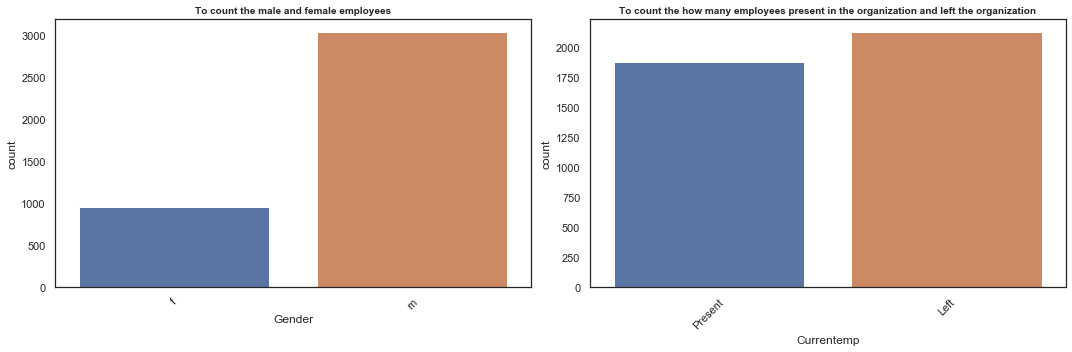

In [170]:
k=plt.figure(figsize=(15,5))
k=plt.subplot(1, 2, 1)
k=sns.countplot(Emp_outcomes["Gender"])
k=plt.xticks(rotation=45)
k=plt.title("To count the male and female employees",fontsize=10,fontweight="bold")
k=plt.tight_layout()


k=plt.subplot(1, 2, 2)
k=sns.countplot(Emp_outcomes["Currentemp"])
k=plt.xticks(rotation=45)
k=plt.title("To count the how many employees present in the organization and left the organization",fontsize=10,fontweight="bold")
k=plt.tight_layout()

In [37]:
from scipy import stats
z=np.abs(stats.zscore(Emp_outcomes['Salary']))
threshold=3
print(np.where(z>3))
#print(z)

(array([   3,   92,  123,  166,  383,  394,  395,  500,  725,  771,  779,
        927,  943,  961, 1237, 1239, 1517, 1746, 1759, 1982, 2030, 2093,
       2109, 2152, 2182, 2216, 2230, 2412, 2472, 2493, 2541, 2565, 2764,
       2880, 3126, 3247, 3276, 3484, 3490, 3710], dtype=int64),)
[0.52794734 0.90404468 0.08133175 ... 0.05782567 0.50632033 0.43392301]


In [47]:
print(len(Emp_outcomes[z>3]))           ####Number of outliers#####
me=Emp_outcomes['Salary'].median()
me

40


300000.0

In [38]:
######Finding outliers using IQR method#####
def outliers_iqr(df,col):    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lb = q1 - (1.5*iqr)
    ub = q3 + (1.5*iqr)
    outliers = []
    for val in df[col]:
        if val < lb or val > ub:
            outliers.append(val)

    return outliers,len(outliers)

In [39]:
outliers_iqr(Emp_outcomes, 'Salary')

([1100000,
  800000,
  1500000,
  1200000,
  675000,
  1860000,
  660000,
  700000,
  785000,
  700000,
  690000,
  700000,
  1110000,
  1200000,
  1000000,
  715000,
  820000,
  720000,
  2600000,
  715000,
  800000,
  1025000,
  775000,
  1300000,
  3500000,
  910000,
  730000,
  680000,
  1300000,
  1050000,
  2000000,
  700000,
  860000,
  800000,
  800000,
  690000,
  4000000,
  2020000,
  700000,
  700000,
  760000,
  800000,
  870000,
  2050000,
  700000,
  1320000,
  755000,
  880000,
  3000000,
  700000,
  720000,
  820000,
  2500000,
  2300000,
  950000,
  1300000,
  1200000,
  4000000,
  700000,
  700000,
  1800000,
  725000,
  1200000,
  720000,
  700000,
  930000,
  680000,
  1000000,
  750000,
  1000000,
  705000,
  1745000,
  2000000,
  1800000,
  850000,
  845000,
  700000,
  660000,
  820000,
  750000,
  1200000,
  670000,
  1030000,
  770000,
  800000,
  720000,
  900000,
  1210000,
  1500000,
  1100000,
  680000,
  675000,
  700000,
  800000,
  700000,
  2000000,
  2

In [40]:
Emp_outcomes.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Currentemp,TotalMarks
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,ssc,1970-01-01,95.8,state,1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,1970-01-01,515,585,525,0.635979,445,0,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,Present,2073.858779
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,1970-01-01,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,1970-01-01,695,610,780,0.960603,0,466,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,Present,2553.601703
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,1970-01-01,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,1970-01-01,615,545,370,0.450877,395,0,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,Present,1927.401177
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,1970-01-01,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,1970-01-01,635,585,625,0.974396,615,0,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,Present,2459.694396
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,1970-01-01,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,1970-01-01,545,625,465,0.124502,0,233,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,Left,1865.856632


In [41]:
outliers_iqr(Emp_outcomes, '10percentage')

([50.6,
  44.16,
  44.0,
  45.6,
  48.0,
  49.0,
  48.0,
  49.0,
  48.8,
  49.0,
  49.0,
  48.5,
  48.0,
  50.6,
  43.0,
  50.0,
  49.0,
  45.33,
  46.24,
  48.0,
  50.5,
  50.0,
  50.0,
  50.66,
  46.8,
  50.0,
  50.0,
  50.0,
  46.0,
  49.9],
 30)

In [42]:
outliers_iqr(Emp_outcomes, '12percentage')

([40.0], 1)

In [43]:
outliers_iqr(Emp_outcomes, 'collegeGPA')

([8.58,
  92.1,
  6.63,
  93.0,
  92.0,
  93.6,
  99.93,
  6.8,
  94.5,
  50.0,
  92.3,
  96.0,
  97.3,
  93.3,
  6.85,
  8.07,
  96.7,
  94.7,
  7.56,
  6.95,
  95.3,
  8.13,
  9.3,
  92.0,
  8.88,
  8.89,
  94.0,
  49.07,
  92.0,
  94.6,
  98.4,
  95.7,
  51.0,
  6.45,
  96.9,
  50.0,
  91.6,
  99.0],
 38)

In [44]:
outliers_iqr(Emp_outcomes, 'TotalMarks')

([3250.258457124318,
  1025.6221439594465,
  3198.609076108103,
  959.1582,
  3512.2882595866517,
  3323.7020039073495,
  961.3571,
  3550.979061394326,
  3674.57649758374,
  3371.233365705695,
  3473.9984761081028,
  1004.311,
  3273.803761394326,
  1030.1591,
  977.7189623037868,
  983.6174,
  3221.432561394326,
  3360.973181754912,
  3202.6053483222577,
  3269.8224483222575,
  3376.848603251997,
  1029.5231999999999,
  3462.7975802456817,
  3634.9855761081026,
  3653.0740595866514,
  3394.0423863472197,
  3296.7039595866513,
  3408.455286892985,
  3252.37202006953,
  3599.4049657056953,
  977.6150372525478,
  3345.5841961125384,
  3225.0307032519972,
  3200.6973963873015],
 34)

In [48]:
Emp_outcomes.isnull().sum()

ID                         0
Salary                     0
DOJ                        0
DOL                        0
Designation                0
JobCity                    0
Gender                     0
DOB                        0
10percentage               0
10board                  350
12graduation               0
12percentage               0
12board                  359
CollegeID                  0
CollegeTier                0
Degree                     0
Specialization             0
collegeGPA                 0
CollegeCityID              0
CollegeCityTier            0
CollegeState               0
GraduationYear             0
English                    0
Logical                    0
Quant                      0
Domain                     0
ComputerProgramming        0
ElectronicsAndSemicon      0
ComputerScience            0
MechanicalEngg             0
ElectricalEngg             0
TelecomEngg                0
CivilEngg                  0
conscientiousness          0
agreeableness 

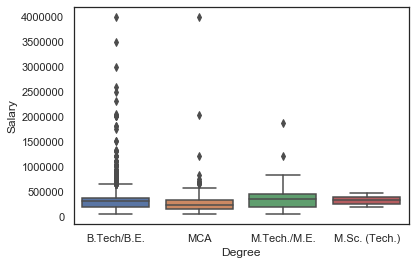

In [52]:
#Comparing with employees salary and degree
sns.boxplot(x="Degree", y="Salary", data = Emp_outcomes)

In [55]:
Emp_outcomes_o = Emp_outcomes[(z < 3)]
Emp_outcomes_o.shape
Emp_outcomes.shape   ######removing salary outliers ######

(3958, 40)

(3998, 40)

In [60]:
Emp_outcomes.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Currentemp,TotalMarks
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,ssc,1970-01-01,95.8,state,1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,1970-01-01,515,585,525,0.635979,445,0,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,Present,2073.858779
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,1970-01-01,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,1970-01-01,695,610,780,0.960603,0,466,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,Present,2553.601703
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,1970-01-01,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,1970-01-01,615,545,370,0.450877,395,0,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,Present,1927.401177
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,1970-01-01,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,1970-01-01,635,585,625,0.974396,615,0,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,Present,2459.694396
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,1970-01-01,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,1970-01-01,545,625,465,0.124502,0,233,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,Left,1865.856632


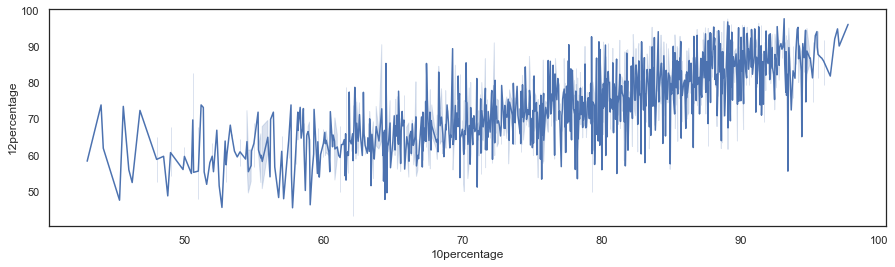

In [87]:
#Comparision b/w 10percentage and 12percentage
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(4)
sns.lineplot(x="10percentage", y="12percentage",data=Emp_outcomes);


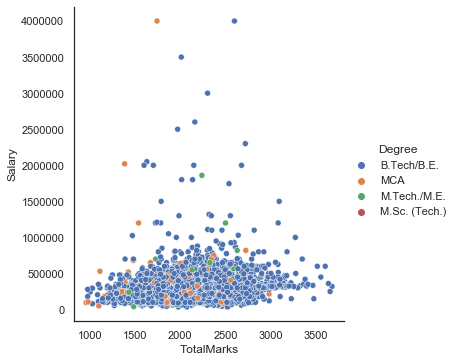

In [86]:
#relation ship plot between salary and Total marks
sns.relplot(x="TotalMarks", y="Salary", hue="Degree", data=Emp_outcomes);

In [107]:
plt.figure(dpi = 1200)
#sns.pairplot(tips_df);
sns.pairplot(Emp_outcomes, hue = 'Degree');

KeyboardInterrupt: 

<Figure size 7200x4800 with 0 Axes>

Error in callback <function flush_figures at 0x000001A186289168> (for post_execute):


KeyboardInterrupt: 

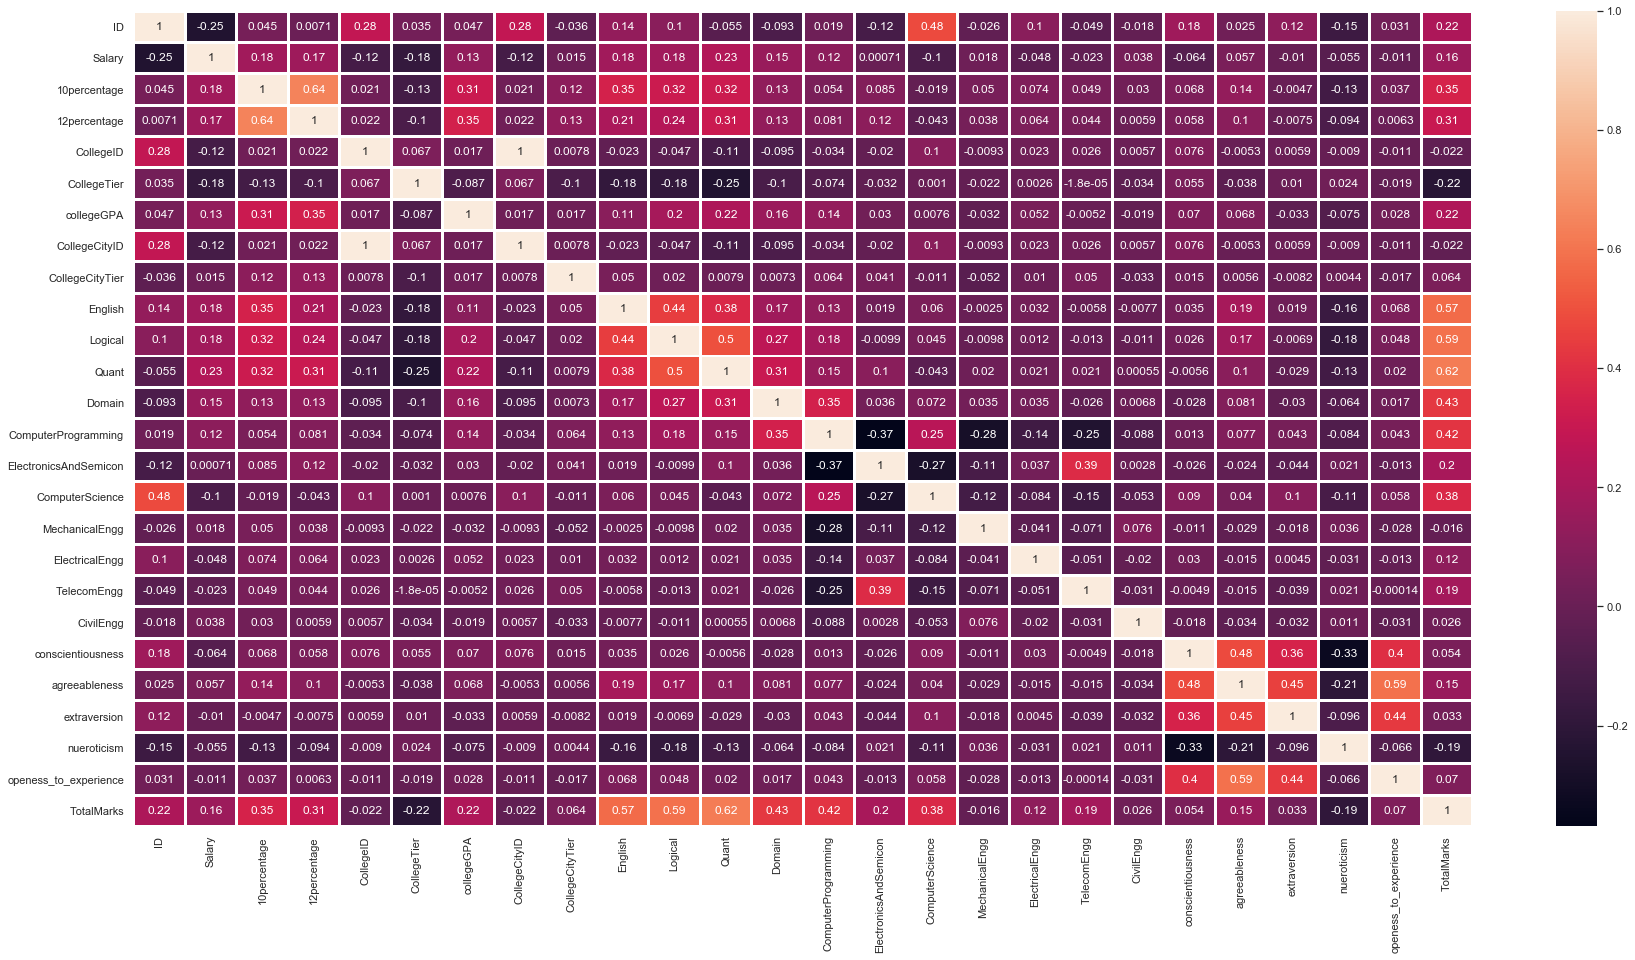

In [95]:
#heatmap tells the correlation between numerical colums
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(15)
sns.heatmap(Emp_outcomes.corr(),linecolor='white',linewidths=2,annot=True);

In [110]:
def outliers_iqr(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr = q3 - q1
    
    lb = q1 - (1.5*iqr)
    ub = q3 + (1.5*iqr)
    outliers = []
    for val in df[col]:
        if val < lb or val > ub:
            outliers.append(val)

    return q1, q3, iqr, lb, ub, len(outliers)

In [111]:
outliers_iqr(Emp_outcomes,'Salary')

(180000.0, 370000.0, 190000.0, -105000.0, 655000.0, 109)

In [112]:
mu = Emp_outcomes.Salary.mean()
std_dev = Emp_outcomes.Salary.std()

mu, std_dev

(307699.8499249625, 212737.4999568574)

In [113]:
lower_3sigma = mu - 3* std_dev
upper_3sigma = mu + 3* std_dev

lower_3sigma, upper_3sigma

(-330512.64994560974, 945912.3497955347)

In [114]:
Emp_outcomes[(Emp_outcomes['Salary'] > lower_3sigma)&(Emp_outcomes['Salary']<upper_3sigma)].shape

(3958, 40)

In [116]:
3958/len(Emp_outcomes)

0.9899949974987494

In [118]:
Emp_outcomes['Salary'].size

3998

In [119]:
Emp_outcomes['Salary'].mean()

307699.8499249625

In [120]:
list(Emp_outcomes['Salary'].sample(10))

[320000, 240000, 375000, 145000, 435000, 140000, 325000, 95000, 350000, 325000]

In [121]:
def clt(df,col,N,n):
    pop_mean = df[col].mean()
    sample_means = []
    for i in range(N):
        sample_means.append(np.mean(list(df[col].sample(n))))
    mean_sample_means = np.mean(sample_means)
    print('population mean {} is {}'.format(col,pop_mean))
    print('mean of sample means is',mean_sample_means)
    sns.histplot(sample_means,kde = True)
    plt.show();

population mean Salary is 307699.8499249625
mean of sample means is 306250.01


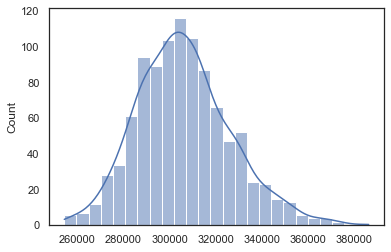

In [123]:
#Normal distribution of salary column 
clt(Emp_outcomes,'Salary',1000,100)

<Figure size 576x720 with 0 Axes>

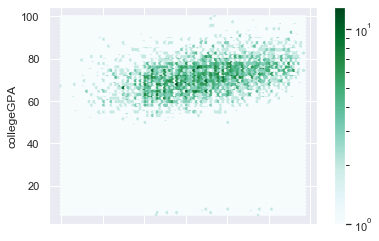

In [215]:
#This hexbin plot is telling that most of the college gpa lies between 60 and 80
fig = plt.figure(figsize=(8, 10))
plt =Emp_outcomes.plot(kind='hexbin',x='12percentage', bins='log',y='collegeGPA')

## Feature Transformation

In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
#Column standardization
scaling =StandardScaler()

In [150]:
k=scaling.fit_transform(Emp_outcomes[['Salary','10percentage','12percentage','collegeGPA','TotalMarks']])

In [147]:
k

array([[ 0.52794734,  0.64723345,  1.93967569,  0.797646  , -0.15389828],
       [ 0.90404468,  0.75892071,  0.95772873, -0.17464063,  1.04063487],
       [ 0.08133175,  0.71830716, -0.56974433, -0.18198788, -0.51856955],
       ...,
       [ 0.05782567,  0.39949082, -0.81523107, -0.18198788, -0.80143128],
       [-0.50632033,  0.08067447, -0.41699702, -0.1305571 , -0.18162062],
       [ 0.43392301, -0.74378053, -0.58792853, -0.42689635, -0.39184505]])

In [151]:
panda_df = pd.DataFrame(data = k, 
                        columns = ['Salary','10percentage','12percentage','collegeGPA','TotalMarks'])
  

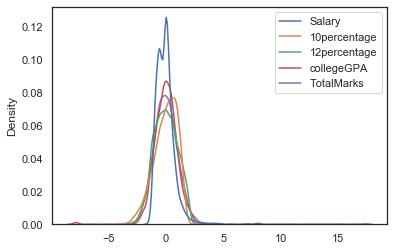

In [152]:
#Density plot
sns.kdeplot(data=panda_df)

In [154]:

category_list=[ 'Gender','10board', '12board', 'Degree','Specialization','Currentemp'
        ]

In [161]:
#Standardization of categorical columns using one hot encoding
for feature in category_list:
    clean_data = pd.get_dummies(Emp_outcomes[category_list],drop_first=True)#####Categorical Data

In [162]:
clean_data

,Gender_m,10board_icse,10board_ssc,10board_state,12board_icse,12board_intermideate,12board_state,Degree_M.Sc. (Tech.),Degree_M.Tech./M.E.,Degree_MCA,Specialization_applied electronics and instrumentation,Specialization_automobile/automotive engineering,Specialization_biomedical engineering,Specialization_biotechnology,Specialization_ceramic engineering,Specialization_chemical engineering,Specialization_civil engineering,Specialization_computer and communication engineering,Specialization_computer application,Specialization_computer engineering,Specialization_computer networking,Specialization_computer science,Specialization_computer science & engineering,Specialization_computer science and technology,Specialization_control and instrumentation engineering,Specialization_electrical and power engineering,Specialization_electrical engineering,Specialization_electronics,Specialization_electronics & instrumentation eng,Specialization_electronics & telecommunications,Specialization_electronics and communication engineering,Specialization_electronics and computer engineering,Specialization_electronics and electrical engineering,Specialization_electronics and instrumentation engineering,Specialization_electronics engineering,Specialization_embedded systems technology,Specialization_industrial & management engineering,Specialization_industrial & production engineering,Specialization_industrial engineering,Specialization_information & communication technology,Specialization_information science,Specialization_information science engineering,Specialization_information technology,Specialization_instrumentation and control engineering,Specialization_instrumentation engineering,Specialization_internal combustion engine,Specialization_mechanical & production engineering,Specialization_mechanical and automation,Specialization_mechanical engineering,Specialization_mechatronics,Specialization_metallurgical engineering,Specialization_other,Specialization_polymer technology,Specialization_power systems and automation,Specialization_telecommunication engineering,Currentemp_Present
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3994,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3995,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3996,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [163]:
pd.concat([clean_data,Emp_outcomes])

,Gender_m,10board_icse,10board_ssc,10board_state,12board_icse,12board_intermideate,12board_state,Degree_M.Sc. (Tech.),Degree_M.Tech./M.E.,Degree_MCA,Specialization_applied electronics and instrumentation,Specialization_automobile/automotive engineering,Specialization_biomedical engineering,Specialization_biotechnology,Specialization_ceramic engineering,Specialization_chemical engineering,Specialization_civil engineering,Specialization_computer and communication engineering,Specialization_computer application,Specialization_computer engineering,Specialization_computer networking,Specialization_computer science,Specialization_computer science & engineering,Specialization_computer science and technology,Specialization_control and instrumentation engineering,Specialization_electrical and power engineering,Specialization_electrical engineering,Specialization_electronics,Specialization_electronics & instrumentation eng,Specialization_electronics & telecommunications,Specialization_electronics and communication engineering,Specialization_electronics and computer engineering,Specialization_electronics and electrical engineering,Specialization_electronics and instrumentation engineering,Specialization_electronics engineering,Specialization_embedded systems technology,Specialization_industrial & management engineering,Specialization_industrial & production engineering,Specialization_industrial engineering,Specialization_information & communication technology,Specialization_information science,Specialization_information science engineering,Specialization_information technology,Specialization_instrumentation and control engineering,Specialization_instrumentation engineering,Specialization_internal combustion engine,Specialization_mechanical & production engineering,Specialization_mechanical and automation,Specialization_mechanical engineering,Specialization_mechatronics,Specialization_metallurgical engineering,Specialization_other,Specialization_polymer technology,Specialization_power systems and automation,Specialization_telecommunication engineering,Currentemp_Present,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Currentemp,TotalMarks
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,

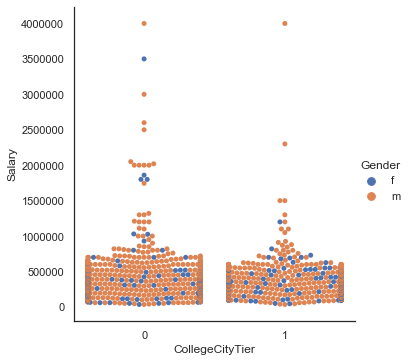

In [164]:
#This below graph tells that 70% of employees are male and Most people salary lies between 0 to 1000000
sns.catplot(x="CollegeCityTier", y="Salary", hue="Gender",
            kind="swarm",
            data=Emp_outcomes);

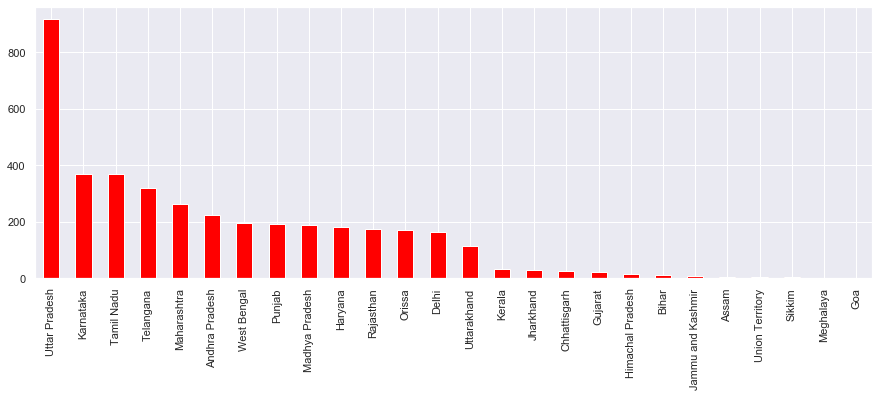

In [203]:
#Barchart on States. Most employees come from uttar pradesh and negligible employees coming from Kashmir
specialization_freq = Emp_outcomes['CollegeState'].value_counts()
specialization_freq.plot(kind='bar', figsize=(15,5),color='red')
plt.show()

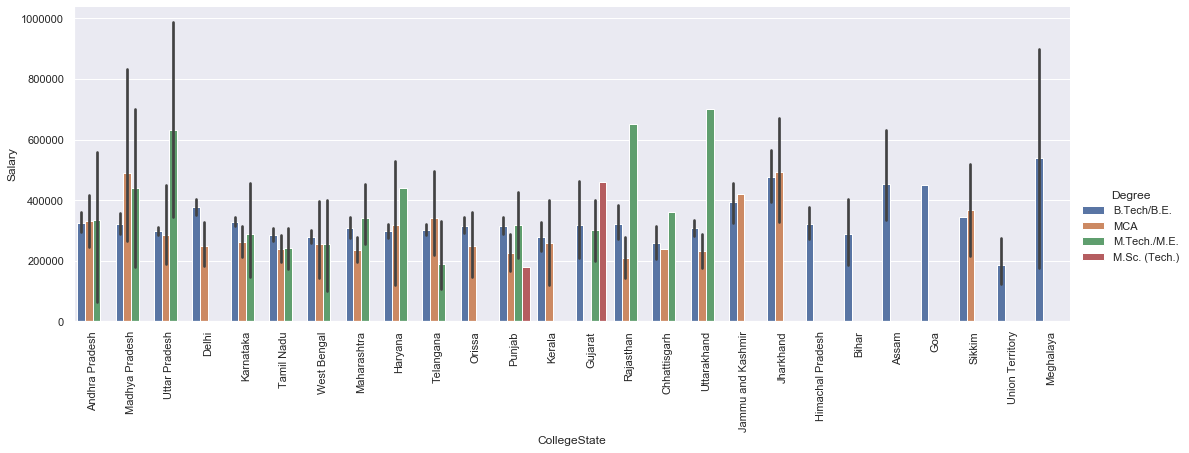

In [197]:
#Barchart based on states and degree
k=sns.catplot(
    data=Emp_outcomes,
    x='CollegeState',
    y='Salary',
    hue='Degree',
    kind='bar',
    height=5, # make the plot 5 units high
    aspect=3) # height should be three times width

k=plt.xticks(rotation=90)